In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
yelp=pd.read_csv('yelp.csv')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


# 1

In [3]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [4]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [7]:
yelp['text length']=yelp['text'].apply(len)

In [8]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


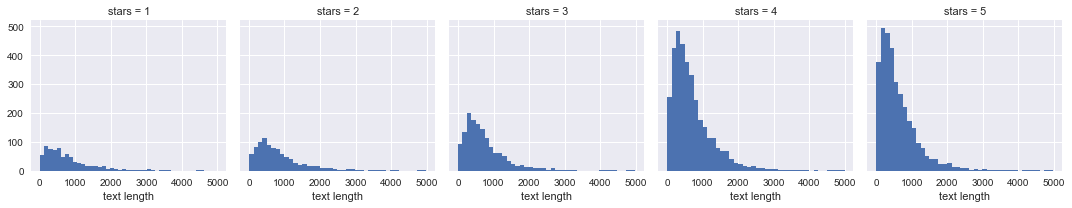

In [17]:
sb.FacetGrid(data=yelp,col='stars').map(plt.hist,'text length', bins=40)
# people likely to leave a commment as the star goes higher

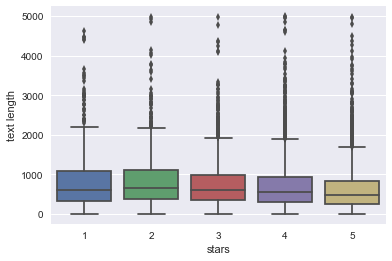

In [19]:
sb.boxplot(x='stars', y='text length', data=yelp)


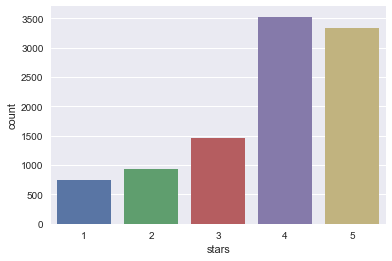

In [21]:
sb.countplot(x='stars', data=yelp)

In [26]:
gyelp=yelp.groupby('stars').mean()
gyelp

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [27]:
gyelp.corr()
# funny is highly correlate to useful and also text length
# so when it is funny, people enjoy typing more

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


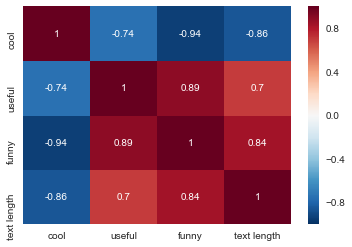

In [29]:
sb.heatmap(gyelp.corr(), annot=True)

# 2

In [118]:
yelp_class =yelp[(yelp['stars']==1) | (yelp['stars']==5)]

In [43]:
X=yelp_class['text']
y=yelp_class['stars']

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(X)

AttributeError: lower not found

In [105]:
print (X)

  (0, 1508)	1
  (0, 7457)	1
  (0, 17344)	1
  (0, 18432)	1
  (0, 2788)	1
  (0, 1027)	1
  (0, 17346)	1
  (0, 3796)	1
  (0, 10637)	1
  (0, 408)	1
  (0, 2354)	1
  (0, 7664)	1
  (0, 11742)	1
  (0, 12678)	1
  (0, 18826)	2
  (0, 2767)	1
  (0, 4817)	1
  (0, 16913)	1
  (0, 15456)	1
  (0, 18200)	1
  (0, 5723)	1
  (0, 14862)	1
  (0, 17667)	1
  (0, 18698)	1
  (0, 10133)	1
  :	:
  (4085, 13749)	1
  (4085, 19074)	1
  (4085, 9097)	3
  (4085, 783)	1
  (4085, 7635)	1
  (4085, 14727)	1
  (4085, 12765)	2
  (4085, 18575)	1
  (4085, 1329)	1
  (4085, 17121)	1
  (4085, 1152)	1
  (4085, 15740)	1
  (4085, 18432)	1
  (4085, 11742)	2
  (4085, 18826)	1
  (4085, 18663)	2
  (4085, 7007)	1
  (4085, 8853)	1
  (4085, 19066)	1
  (4085, 14998)	1
  (4085, 17134)	1
  (4085, 17126)	5
  (4085, 937)	1
  (4085, 11821)	2
  (4085, 11265)	2


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [72]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [73]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [93]:
predictions=nb.predict(X_test)

In [74]:
from sklearn.metrics import classification_report as cr, confusion_matrix as cm

In [78]:
print (cm(y_test, predictions))
print (cr(y_test, predictions))

[[159  69]
 [ 22 976]]
             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



# will it be better if i use tf-idf?

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [106]:
tfidf_transformer = TfidfTransformer().fit(X)

In [107]:
yelp_tfidf=tfidf_transformer.transform(X)

In [109]:
print (yelp_tfidf)

  (0, 11265)	0.0611605895538
  (0, 18735)	0.0851842985244
  (0, 17406)	0.0689310925676
  (0, 10635)	0.0429611957413
  (0, 8161)	0.0828635449606
  (0, 11821)	0.100328574754
  (0, 1984)	0.0914349685428
  (0, 6864)	0.0275763458343
  (0, 2364)	0.0787183950586
  (0, 937)	0.166848118984
  (0, 9114)	0.246670428238
  (0, 18517)	0.253400602092
  (0, 6123)	0.203456717552
  (0, 17126)	0.207382704077
  (0, 18585)	0.109824815603
  (0, 12505)	0.0690664023954
  (0, 18672)	0.0518619840504
  (0, 10300)	0.120074541382
  (0, 15422)	0.0897167295963
  (0, 12016)	0.0777208043096
  (0, 12054)	0.140489599608
  (0, 17134)	0.178362027758
  (0, 7715)	0.121042870365
  (0, 921)	0.0463555634117
  (0, 407)	0.108657393326
  :	:
  (4085, 9817)	0.103086522303
  (4085, 10088)	0.136734705498
  (4085, 9127)	0.094629659825
  (4085, 10873)	0.117960250413
  (4085, 2154)	0.145760235433
  (4085, 183)	0.111978518225
  (4085, 10907)	0.13212112471
  (4085, 17416)	0.096008463567
  (4085, 6370)	0.0982286649325
  (4085, 3314)	0.1177

In [114]:
yelp_tfidf_train,yelp_tfidf_test, y_train, y_test = train_test_split(yelp_tfidf, y, test_size=0.3, random_state=101)

In [115]:
nb.fit(yelp_tfidf_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [116]:
predictions_tfidf=nb.predict(yelp_tfidf_test)

In [117]:
print (cm(y_test, predictions_tfidf))
print (cr(y_test, predictions_tfidf))

[[  0 228]
 [  0 998]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



C:\Users\Michael\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
# worse

#  or using pipeline

In [82]:
from sklearn.pipeline import Pipeline

In [119]:
pipeline=Pipeline([
    ('cv1', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('MNB', MultinomialNB())
])

In [120]:
X1=yelp_class['text']
y1=yelp_class['stars']

In [121]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=101)

In [122]:
pipeline.fit(X1_train, y1_train)

Pipeline(steps=[('cv1', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...inear_tf=False, use_idf=True)), ('MNB', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [123]:
predictions2=pipeline.predict(X1_test)

In [124]:
print (cm(y1_test, predictions2))
print (cr(y1_test, predictions2))

[[  0 228]
 [  0 998]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



C:\Users\Michael\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# try using random forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
pipeline=Pipeline([
    ('cv1', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('rfcer', RandomForestClassifier())
])

In [102]:
pipeline.fit(X1_train, y1_train)

Pipeline(steps=[('cv1', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])

In [103]:
predictions3=pipeline.predict(X1_test)

In [104]:
print (cm(y1_test, predictions3))
print (cr(y1_test, predictions3))

[[ 50 178]
 [ 19 979]]
             precision    recall  f1-score   support

          1       0.72      0.22      0.34       228
          5       0.85      0.98      0.91       998

avg / total       0.82      0.84      0.80      1226



In [ ]:
# better using random forest model, but the first one was better